In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Seaborn Objects Tutorial
Data imported from seaborn, tutorial on <a href="https://seaborn.pydata.org/tutorial/objects_interface.html"> Seaborn's Website</a>.

## Interface
The **seaborn.objects** (so) namespace will provide access to all of the relevant classes. Most importantly is **Plot** which creates the graphical interface we know and love. Here's an example using the _Penguins_ dataset.

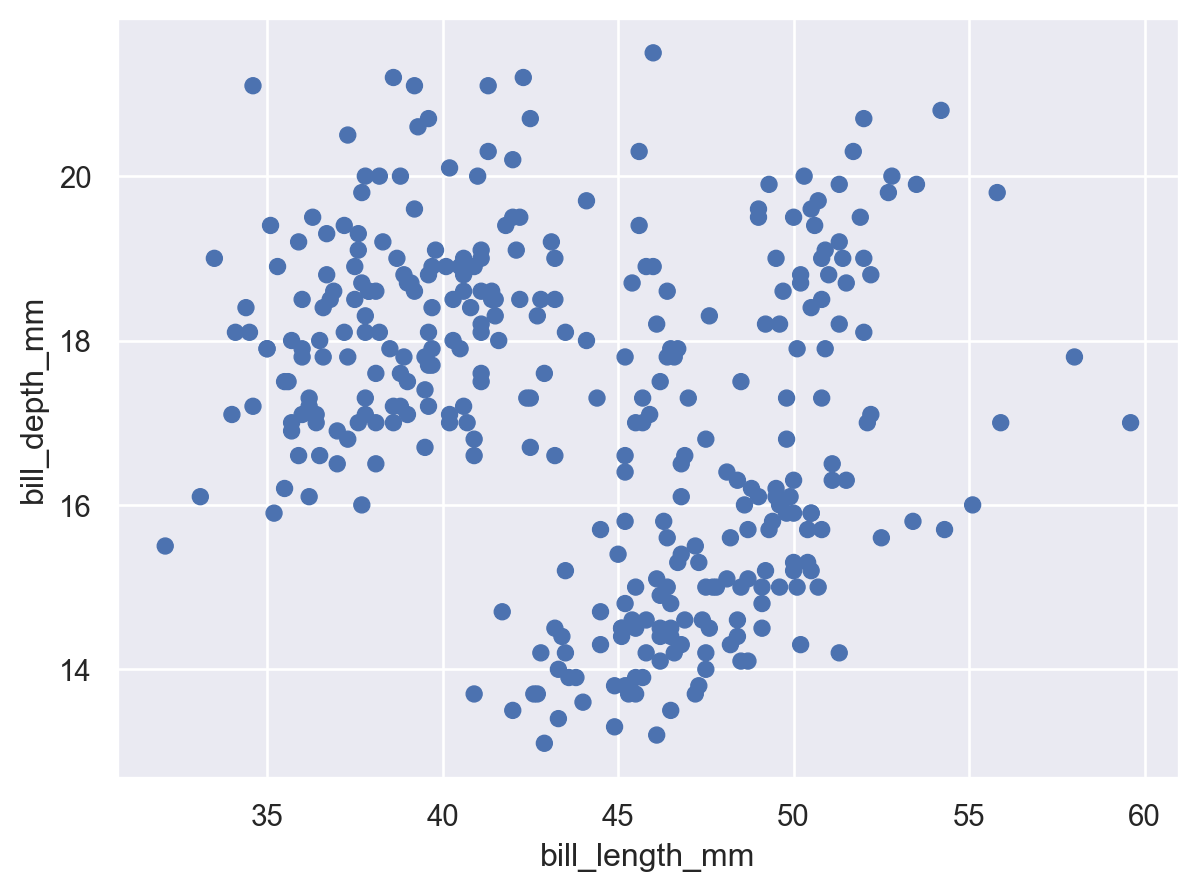

In [2]:
penguins = sns.load_dataset('penguins')

(
    so.Plot(penguins, 'bill_length_mm', 'bill_depth_mm')    # Feeding the data to the plot function
    .add(so.Dot())                                          # Telling the graph what kind of markings we want
)

### Setting Properties
The **Dot()** class is an example of a _Mark_, which is an object that graphically represents data values. Each mark will have a number of properties that can be set to change its appearance.

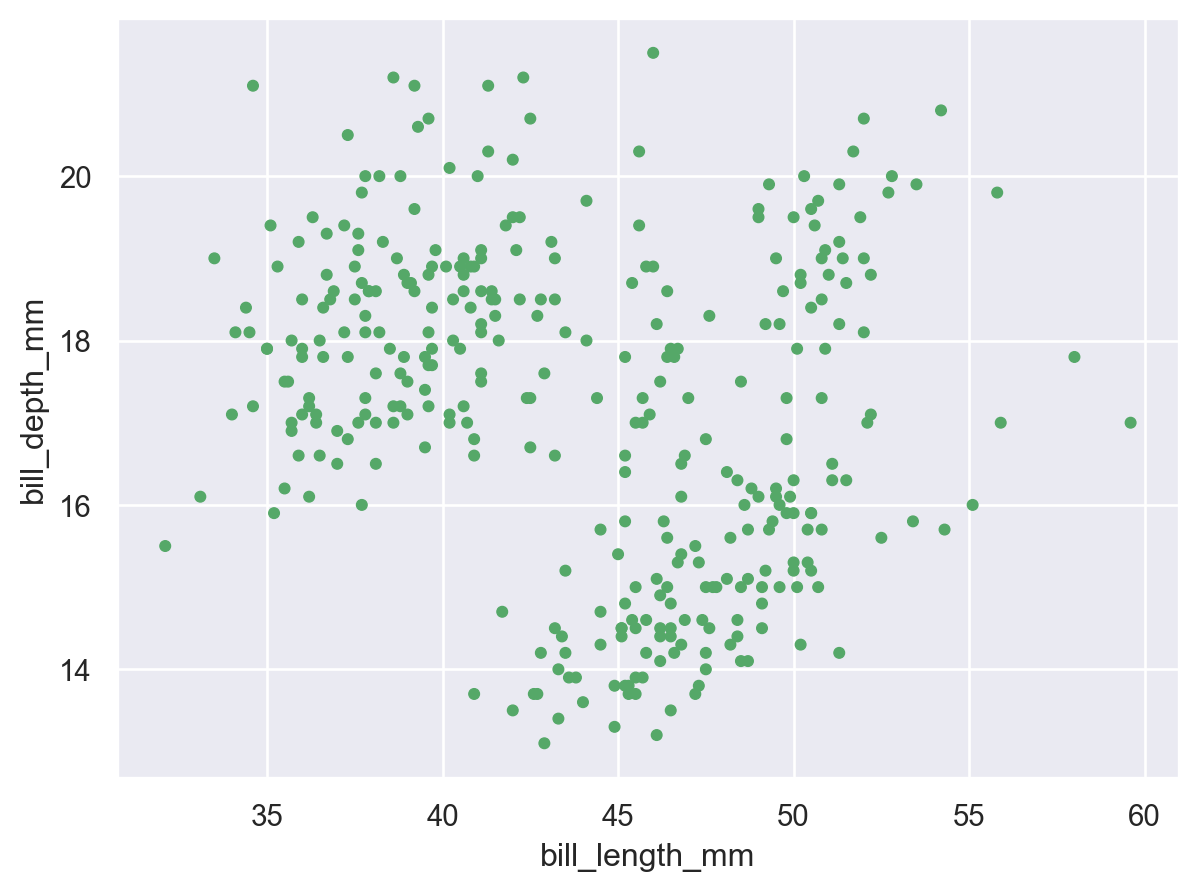

In [7]:
# Dot properties
(
    so.Plot(penguins, x= 'bill_length_mm', y= 'bill_depth_mm')  # Passing data information
    .add(so.Dot(color= 'g', pointsize= 4))                      # Defining how we want Dot() to look
)

### Mapping Properties
As with seaborn's functions, it is also possible to _map_ data values to various graphical properties.

While this basic functionality is not novel, its an important difference from the function of the API that properties are mapped using the same parameter names that would set them directly (instead of having _hue_ vs _color_). What matters is _where_ the property is defined. Passing a value when you initialize **Dot** will set it directly, whereas assinging a variable when you set up the **Plot** will _map_ the corresponding data.

Beyond this difference, the objects interface also allows a much wider range of marking properties to be mapped.

In [ ]:
(
    so.Plot(
        penguins, x= 'bill_length_mm', y= 'bill_depth_mm',  # Data
        color= 'species', pointsize= 'body_mass_g')         # How the Color has meaning, pointsize has meaning
    .add(so.Dot())                                          # Display as Dot
)

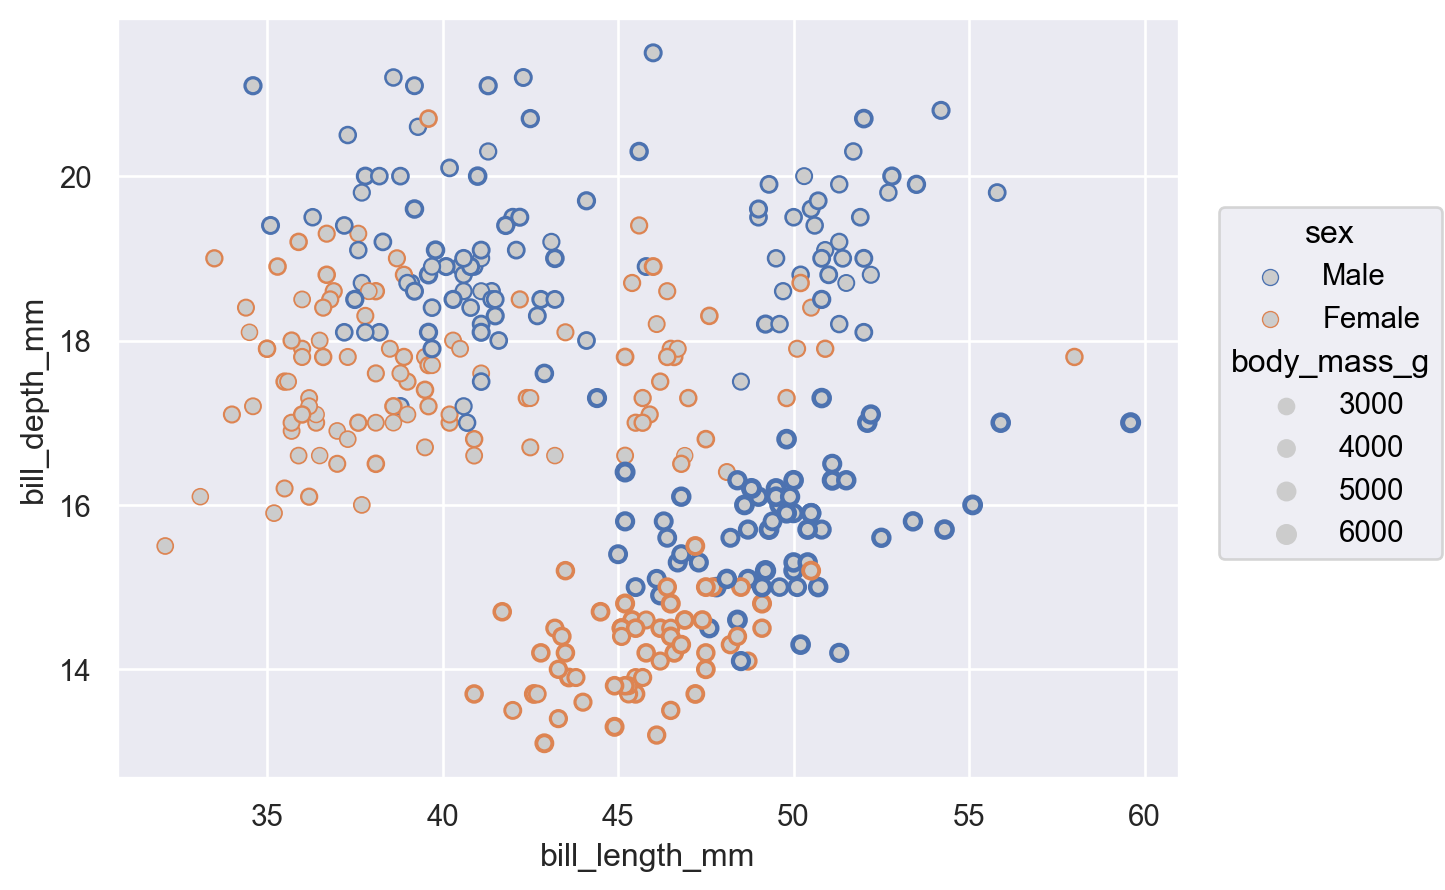

In [12]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor= 'sex', edgewidth= 'body_mass_g'
    )
    .add(so.Dot(color= ".8"))
)

### Defining Groups
The **Dot** mark represents each data point independently, so the assignment of a variable to a property only has the effect of changing each dot's appearance. For marks that group or connect observations, such as **Line**, it also determines the number of distinct graphical elements.

We can also define a grouping without changing any visual properties by using **group**.

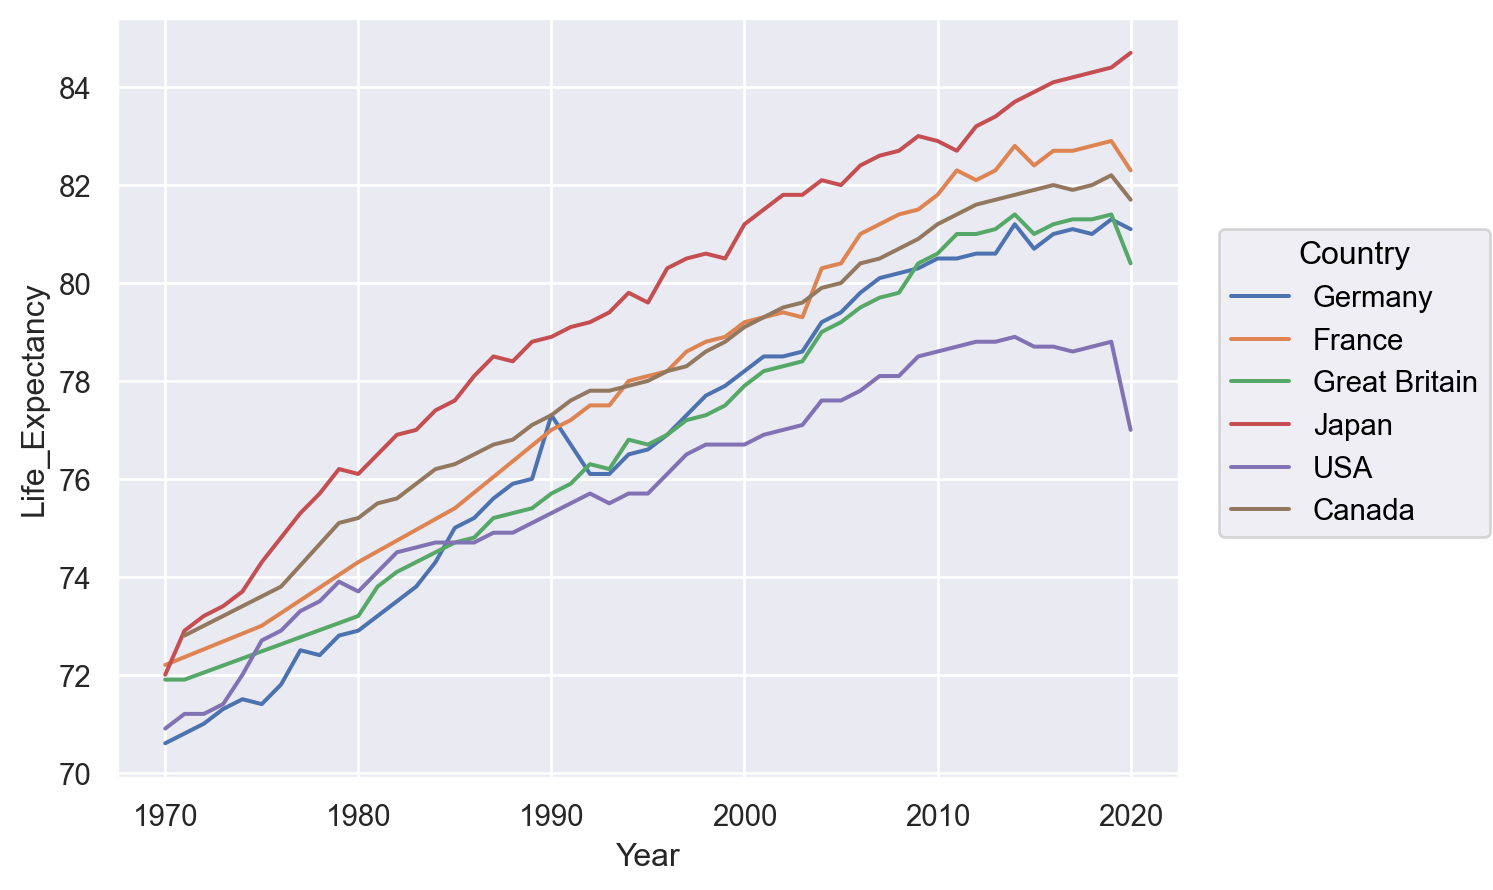

In [3]:
healthexp = sns.load_dataset('healthexp')
(
    so.Plot(healthexp, x= 'Year', y= 'Life_Expectancy', color= 'Country')
    .add(so.Line())
)

In [ ]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

### Transforming Data before Plotting

#### Statistical Transformation
As with many seaborn functions, the objects interface supports statistical transformations. These are performed by **Stat**, such as **Agg()**. **Agg** will aggregate data along the value axis using a given method such as 'mean'. 

In the function interface, statistical transformations are possible with some visual representations (eg., _sns.barplot()_) but not others (_sns.scatterplot()_). The objects interface more cleanly separates representation and transformation, allowing you to compose **Mark** and **Stat** objects.

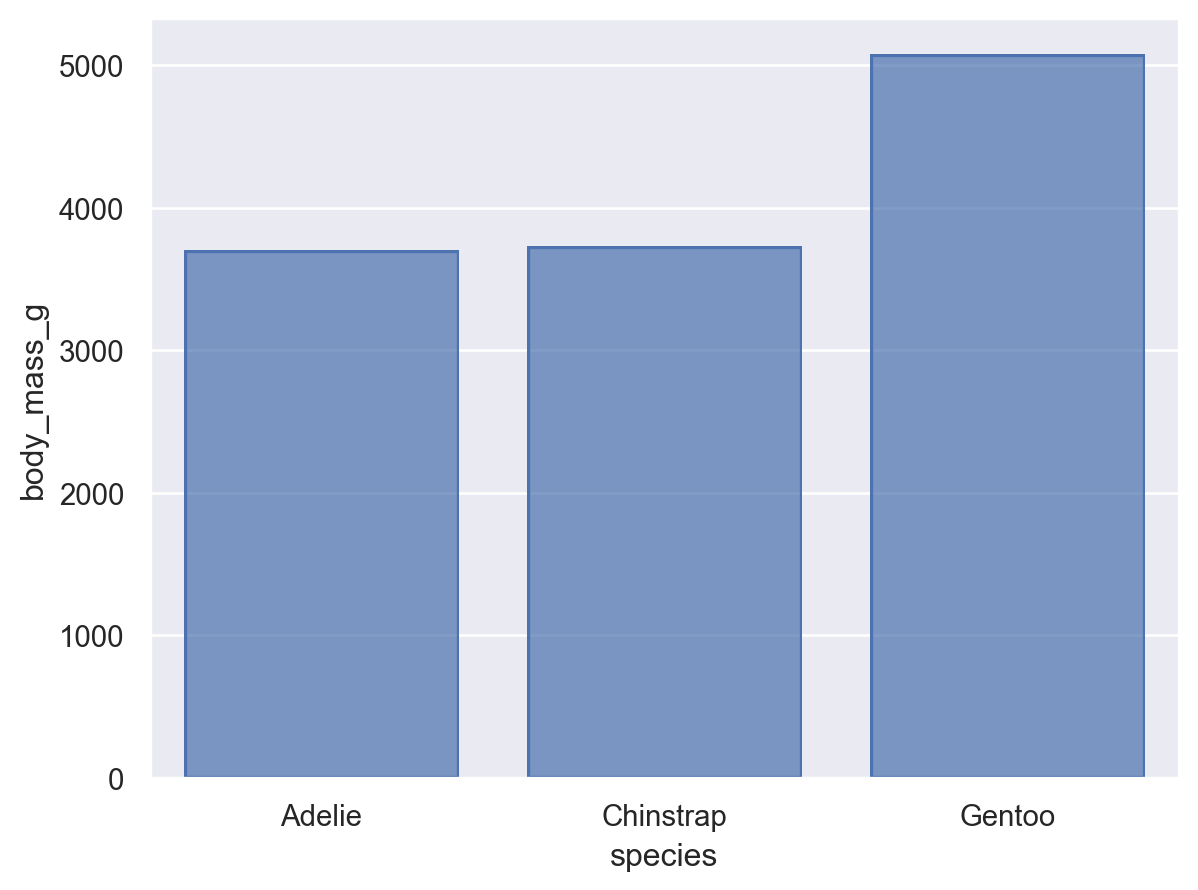

In [5]:
(
    so.Plot(penguins, x= 'species', y= 'body_mass_g')
    .add(so.Bar(), so.Agg())
)

In [ ]:
(
    so.Plot(penguins, x= 'species', y= 'body_mass_g')
    .add(so.Dot(pointsize= 10), so.Agg())
)

#### Groups in Stats
Whne forming groups by mapping properties, the **stat** transformation is applied to each group seperately.

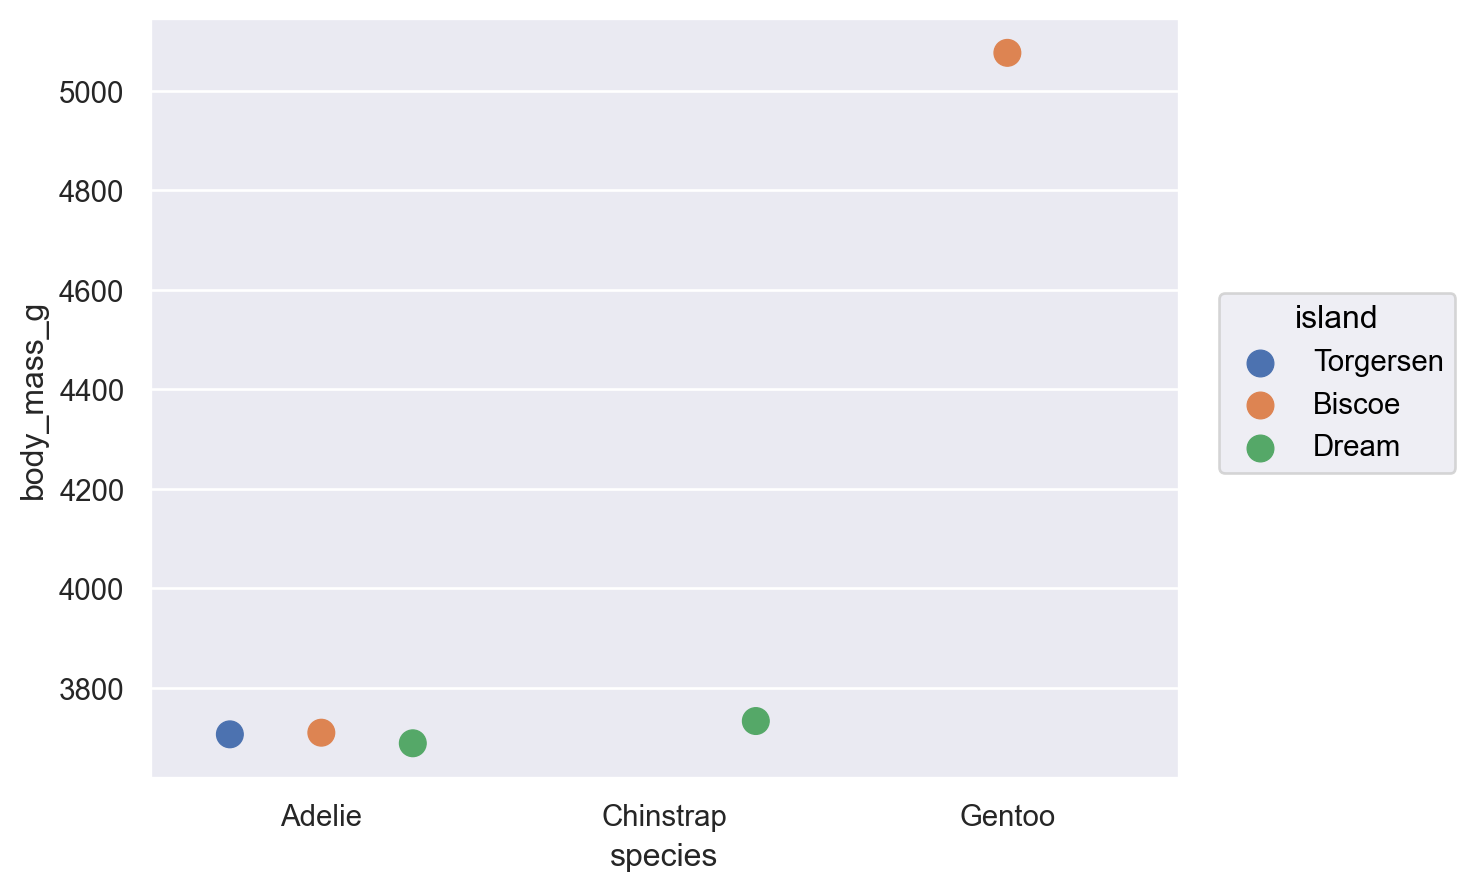

In [12]:
a1= (
    so.Plot(penguins, x= 'species', y= 'body_mass_g', color= 'island')
    .add(so.Dot(pointsize= 10), so.Agg(), so.Dodge())
)
a1

### Resolving Overplotting
Some seaborn fucntions also have mechanisms that automatically resolve overplotting, as when _sns.barplot()_ "dodges" bars once _hue_ is assigned. The objects interface has a much less complex default behavior. Bars representing multiple groups will overlap by default. However, we can also compose the bar mark with the **Agg** stat and a second transformation implemented by **Dodge**.

In [ ]:
(
    so.Plot(penguins, x= 'species', y= 'body_mass_g', color= 'sex')
    .add(so.Bar(), so.Agg())
)

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

##### Move
The **Dodge** class is an example of a **Move** transformation, which is like a **Stat** but only adjusts **x** and **y** coordinates. the **Move** class can be applied with a mark, and it's not necessary to use a **Stat** first.

In [ ]:
(
    so.Plot(penguins, x= 'species', y= 'body_mass_g', color= 'sex')
    .add(so.Dot(), so.Dodge(), so.Jitter(0.5))      # Added jitter to show we can do multiple move operations
)

# Properties of API

## .add

In [ ]:
tips = sns.load_dataset('tips')
p = so.Plot(tips, 'total_bill', 'tip').add(so.Dot())
p


#### Adding extra information to the graph

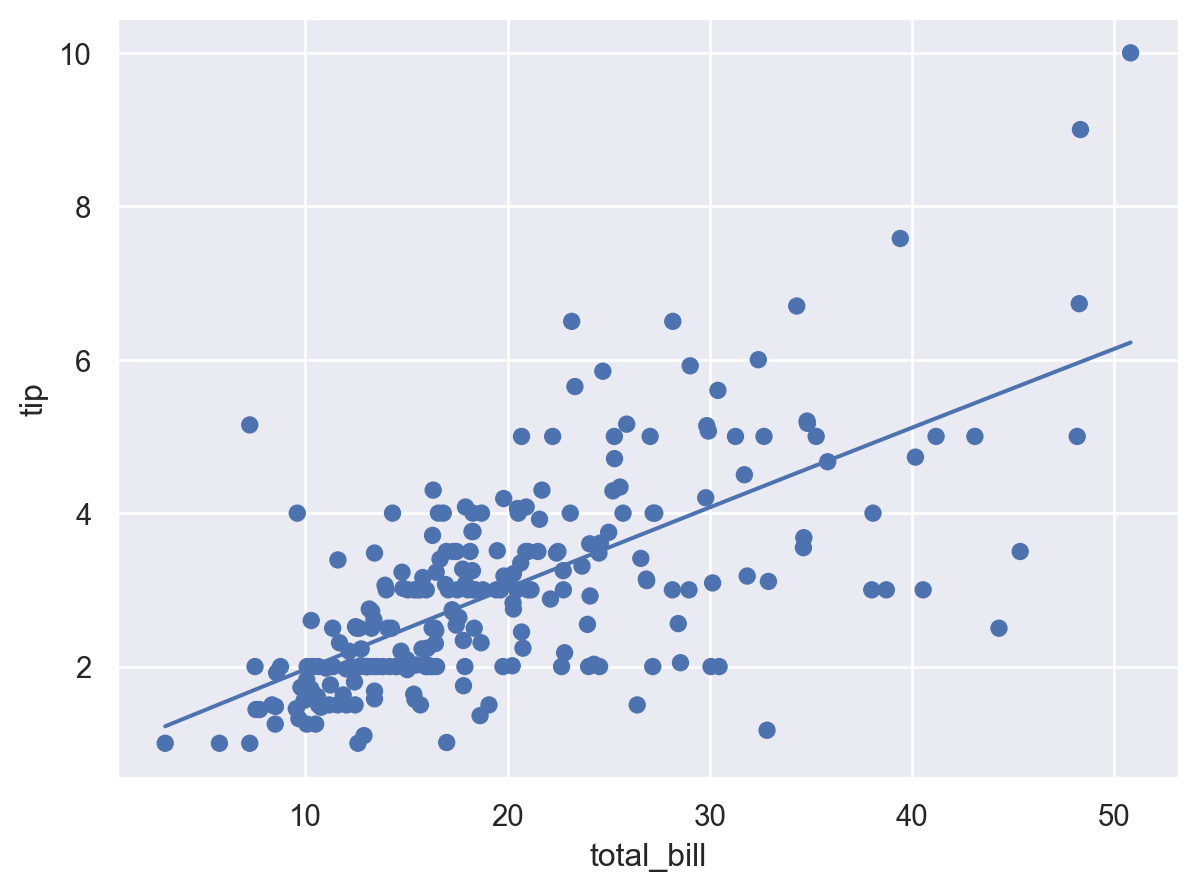

In [2]:
tips = sns.load_dataset('tips')
p = so.Plot(tips, 'total_bill', 'tip').add(so.Dot())

#calling the previous graph with .add() will add new information to the graph
p.add(so.Line(), so.PolyFit())

#### Pipeline
Multiple _transforms_ can be stacking into a pipeline.

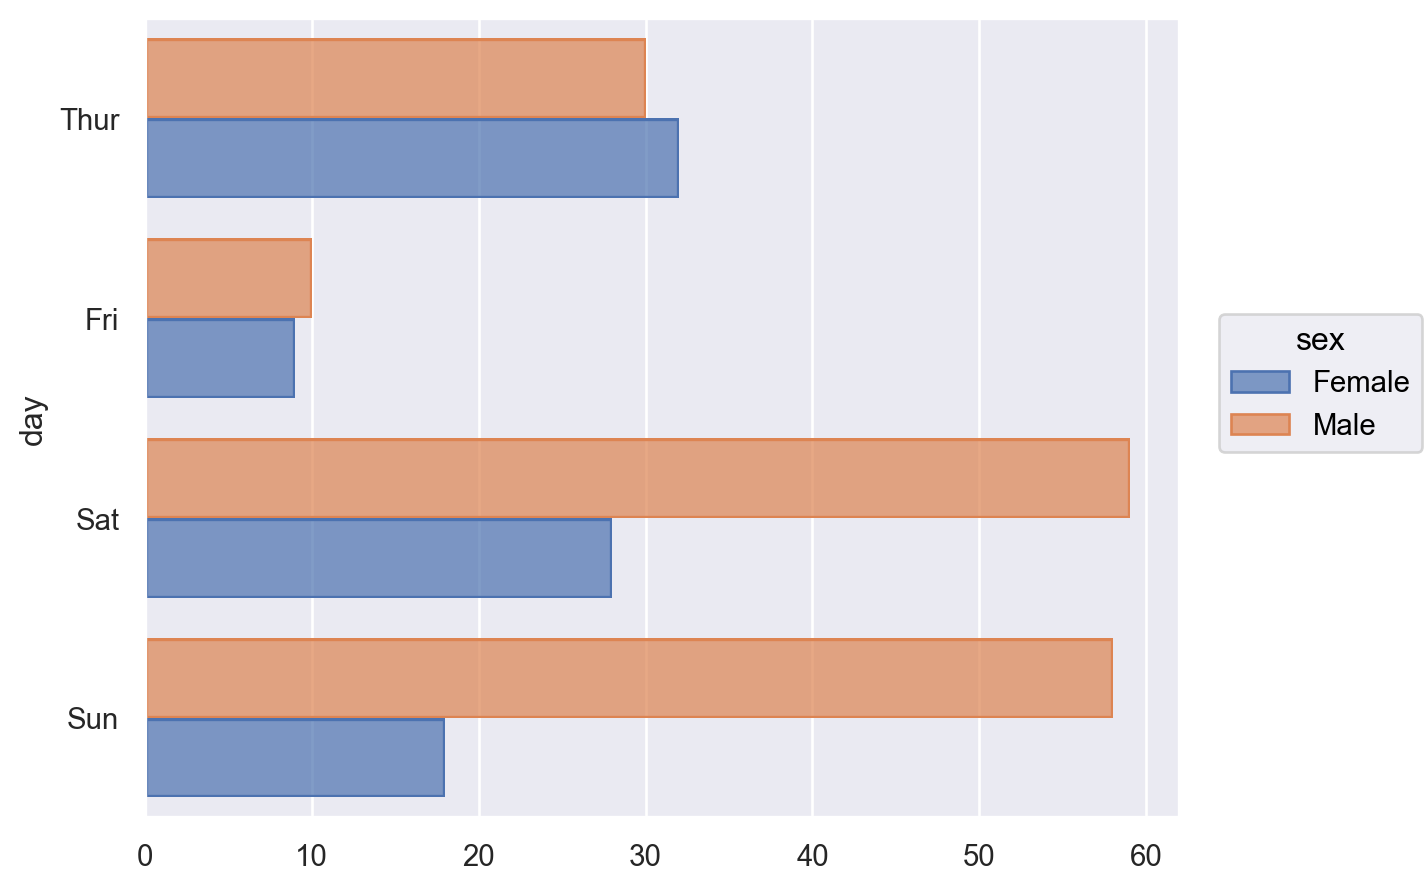

In [30]:
s = (
    so.Plot(tips, y= 'day', color= 'sex')
    .add(so.Bar(),  # Creates the bars 
        so.Hist(),  # Bin ovservations and dcount them
        so.Dodge()  # Seperates data so it doesn't overlap
        )
)
s

### Layers and Orientation
Layers have an _orientation_ which affects the transforms and some marks. The orientation is typically inferred from the variable types assigned to **x** and **y**. But it can be specified when it would otherwise be ambiguous

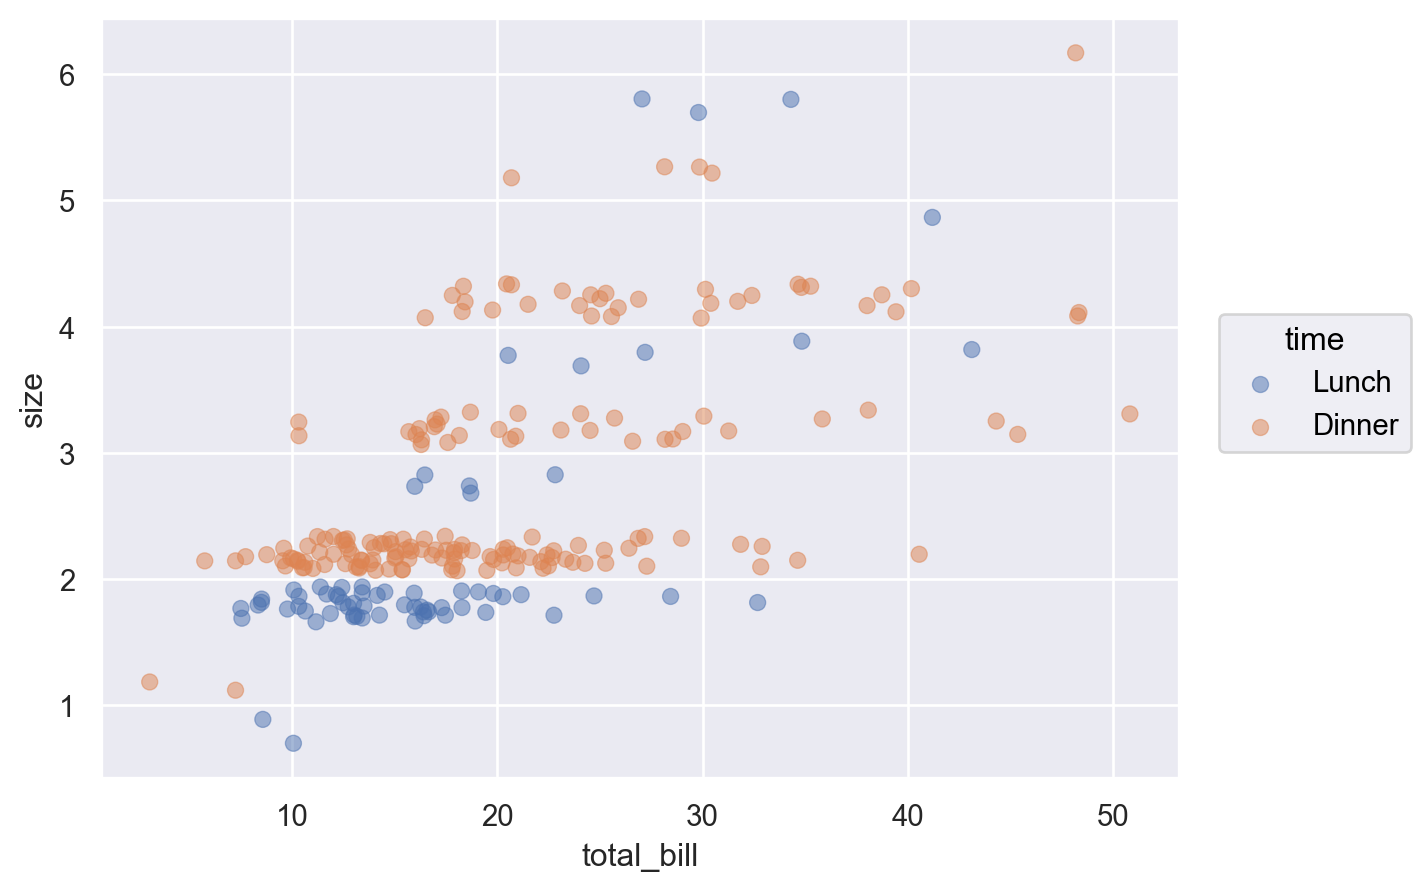

In [4]:
t = (
    so.Plot(
        tips, 
        x= 'total_bill',# bill price
        y= 'size',      # party size
        color= 'time'   # Change color based on time, binary of lunch or dinner
        )

    .add(
        so.Dot(alpha= 0.5),     # Dot points for the x/y values
        so.Dodge(),             # Seperate data
        so.Jitter(0.7),         # Move points so they don't overlap as much. Higher values seperate more
        orient= 'y'             # Not sure what this does, seems to keep the lunch/dinner from overlapping
    )
)
t

Variables can be assigned to a specific layer. <br>
Notice the destrinction between how **pointsize** is passed to **Plot.add** - so it is _mapped_ by a scale - while **color** and **linewidth** are passed directly to **Line**. So they directly set the line's color and width.

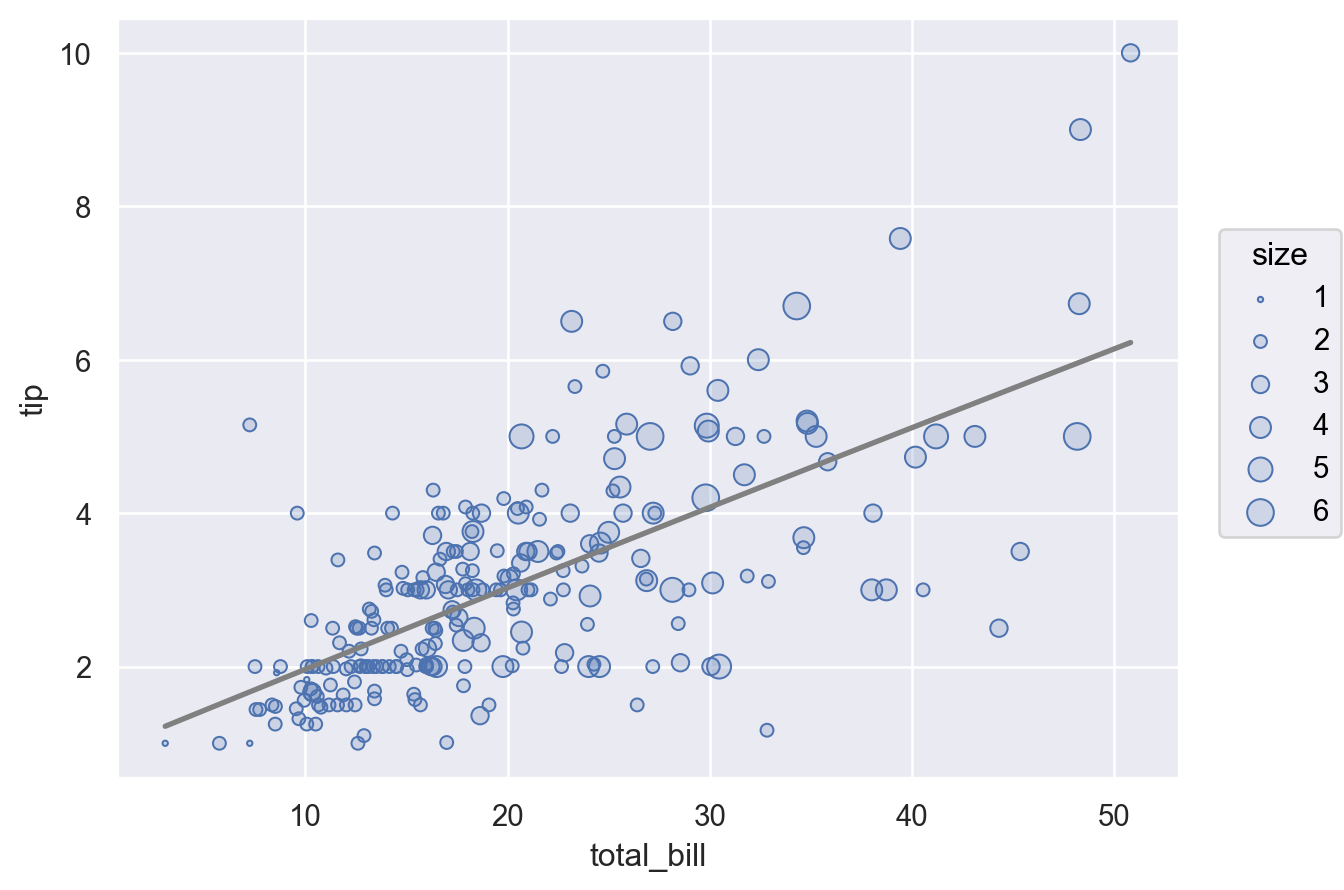

In [11]:
a1= (
    so.Plot(tips, 'total_bill', 'tip')
    .add(so.Dots(), pointsize= 'size')      # Point size is determined by the number of people in a group (1 - 6). Dots makes points semitransparent
    .add(so.Line(color= "0.5", linewidth= 2), so.PolyFit())     # color changes the opacity, polyfit finds the Polynomial line to fit the data
    .scale(pointsize= (2, 10))              # Setting the bounds of point size. Ranges from 2 - 10
)
a1

#### **Facet** and **Layers**
Variables that would otherwise apply to the entire plot can also be _excluded_ from a specific layer by setting their values to **None**. We are also introduced to facets here but will go into more detail later.

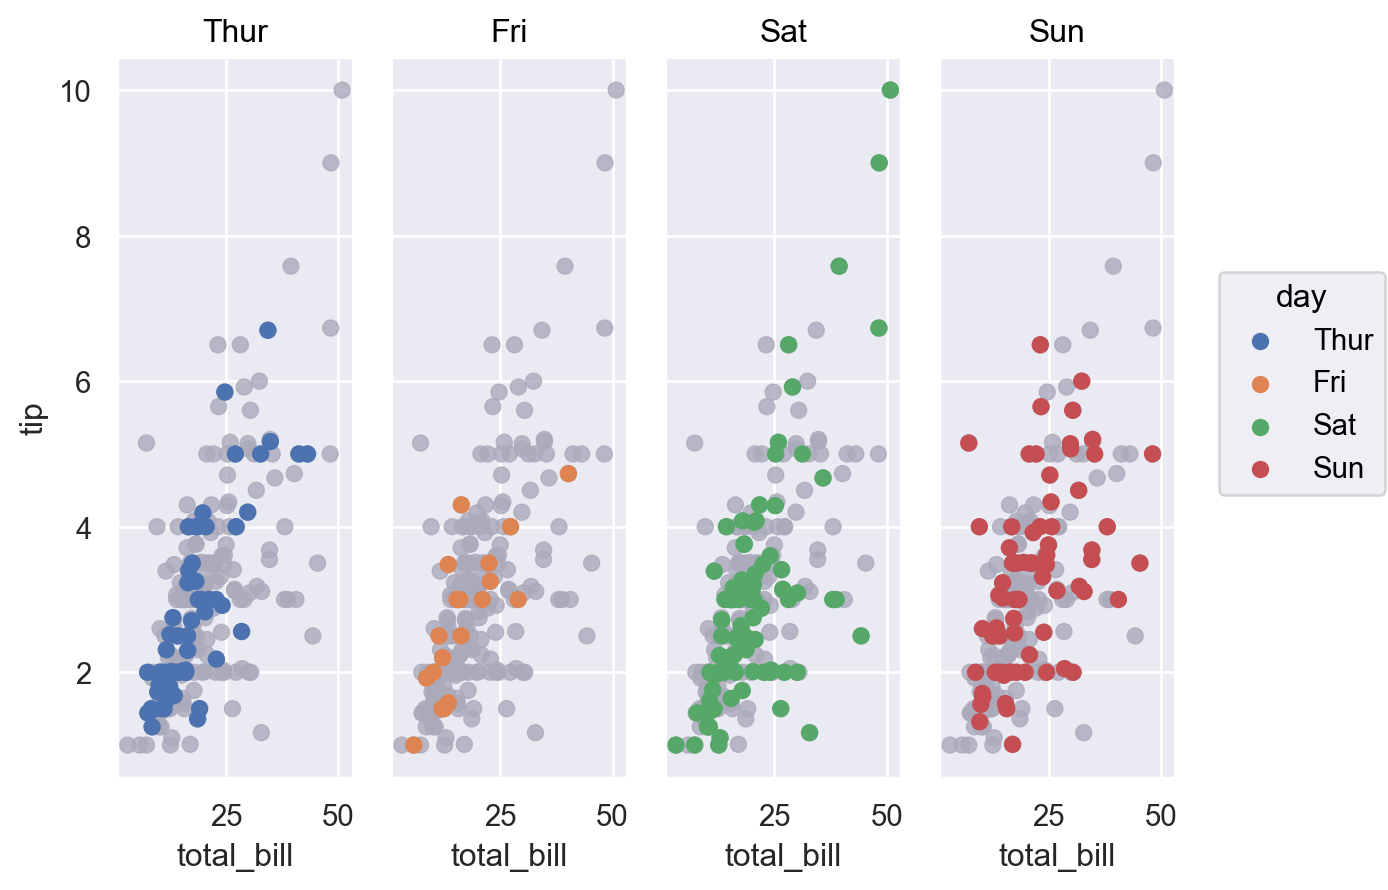

In [22]:
a2 = (
    so.Plot(tips, 'total_bill', 'tip', color= 'day')
    .facet(col= 'day')          # setting the columns up as the days, so each day has different data. Use this in weather project.
    .add(so.Dot(color= '#aabc'), col= None, color= None)    # Background dots of grey for days that aren't highlighted
    .add(so.Dot())              # Adding in the dots that are colored for each day. Dot used instead of Dots for filled in circle 
)
a2

#### Layers Continued
Variables used only by the transforms ***must*** be passed at the _layer_ level.

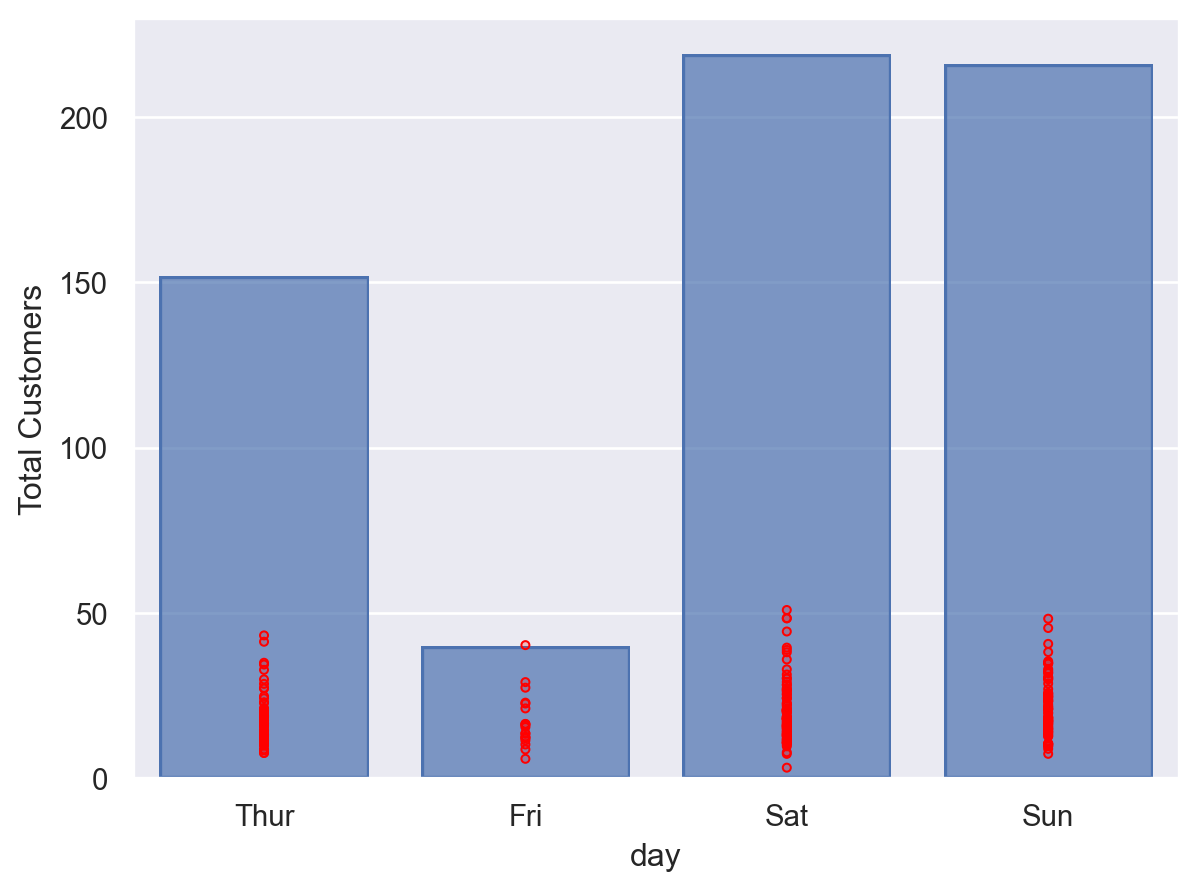

In [49]:
a3 = (
    so.Plot(tips, 'day')
    .add(so.Bar(), so.Hist(), weight= 'size')
    .add(so.Dots(color= 'red', pointsize= 3), data= tips, x= 'day', y= 'total_bill')          # Come back to, figure out how to have a line over the peaks of the bars.
    .label(y= 'Total Customers')
)
a3

##### More
**Each layer can be provided with its own data source**. If a data source was provided in the construction, the layer data will be joined using its index. <br>
Each layer can have its own **x** and **y** values to map onto the existing plot.

Providing a label will annotate the layer in the plot's legend.

In [ ]:
a4 = (
    so.Plot(tips, 'total_bill', 'tip')
    .add(so.Dot(color= '#aabc'), label= 'Other Group Sizes')
    .add(so.Dot(), data= tips.query("size == 2"), color= 'time')
)
a4

## .scale

### Overall 
Scale provides spcific mappings from data units into visual properties. Keywords correspond to variables defined in the plot, including coordinate variables _(x, y)_ and semantic variables _(color, pointsize, etc.)_

There are a number of "_magic_" arguments that are accepted, including:
* The name of the transform (eg., "log", "sqrt") Log and square root.
* The name of a palette (eg., "viridis", "muted") Color pallets in Seaborn.
* A tuple of values, defining the output range (eg., (1, 5))
* A dictionary, implying a **nominal** scale (eg., {'a': .2, 'b': .5})
* A list of values, implying a **nominal** scale (eg., ['b', 'r'])

For more _explicit_ control, pass a scale spec object such as **Continous** or **Nominal**. Or pass _None_ to use an "identity" scale, which treats dat avalues as literally encoding visual properties.

In the following example we pass the name of a function such as "log" or "symlog". It will set the scale's transform.

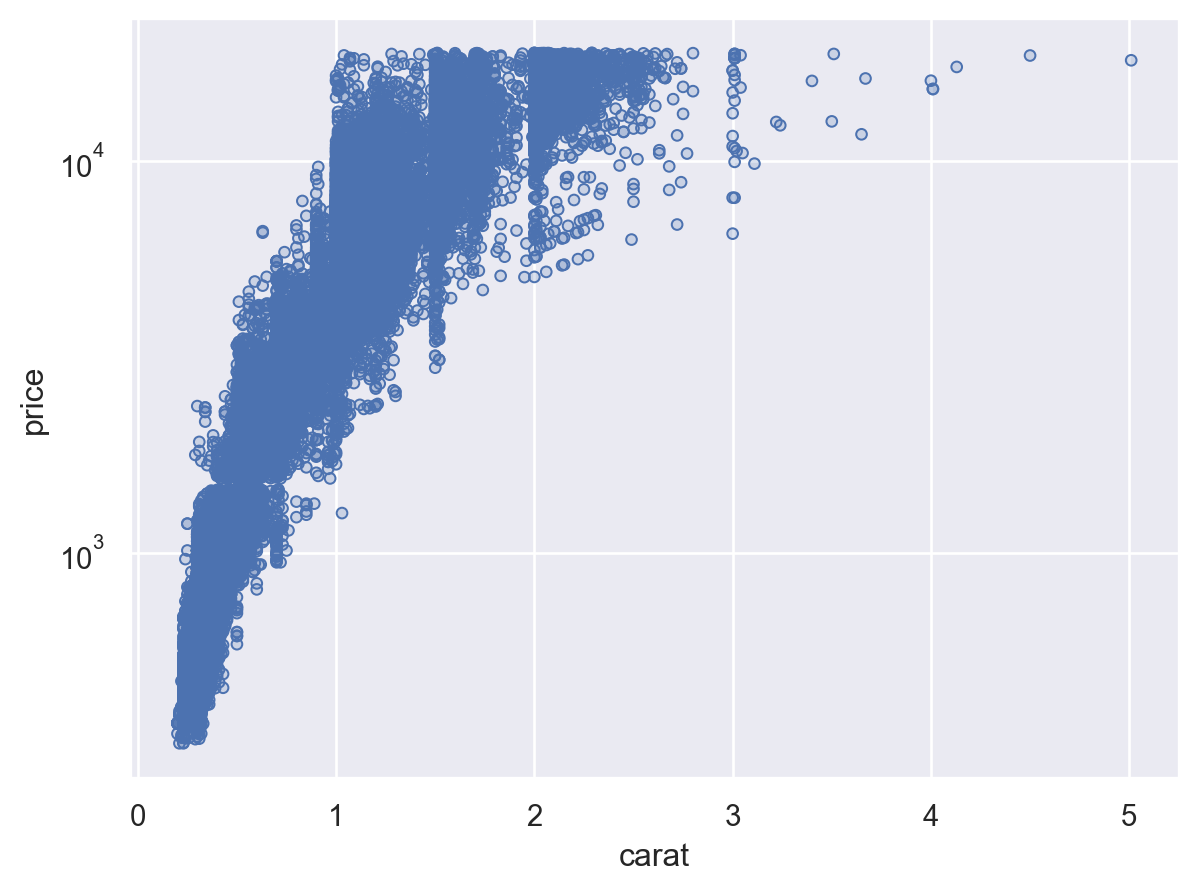

In [2]:
diamonds = sns.load_dataset('diamonds')
p1 = so.Plot(diamonds, 'carat', 'price')
p1.add(so.Dots()).scale(y= 'symlog')

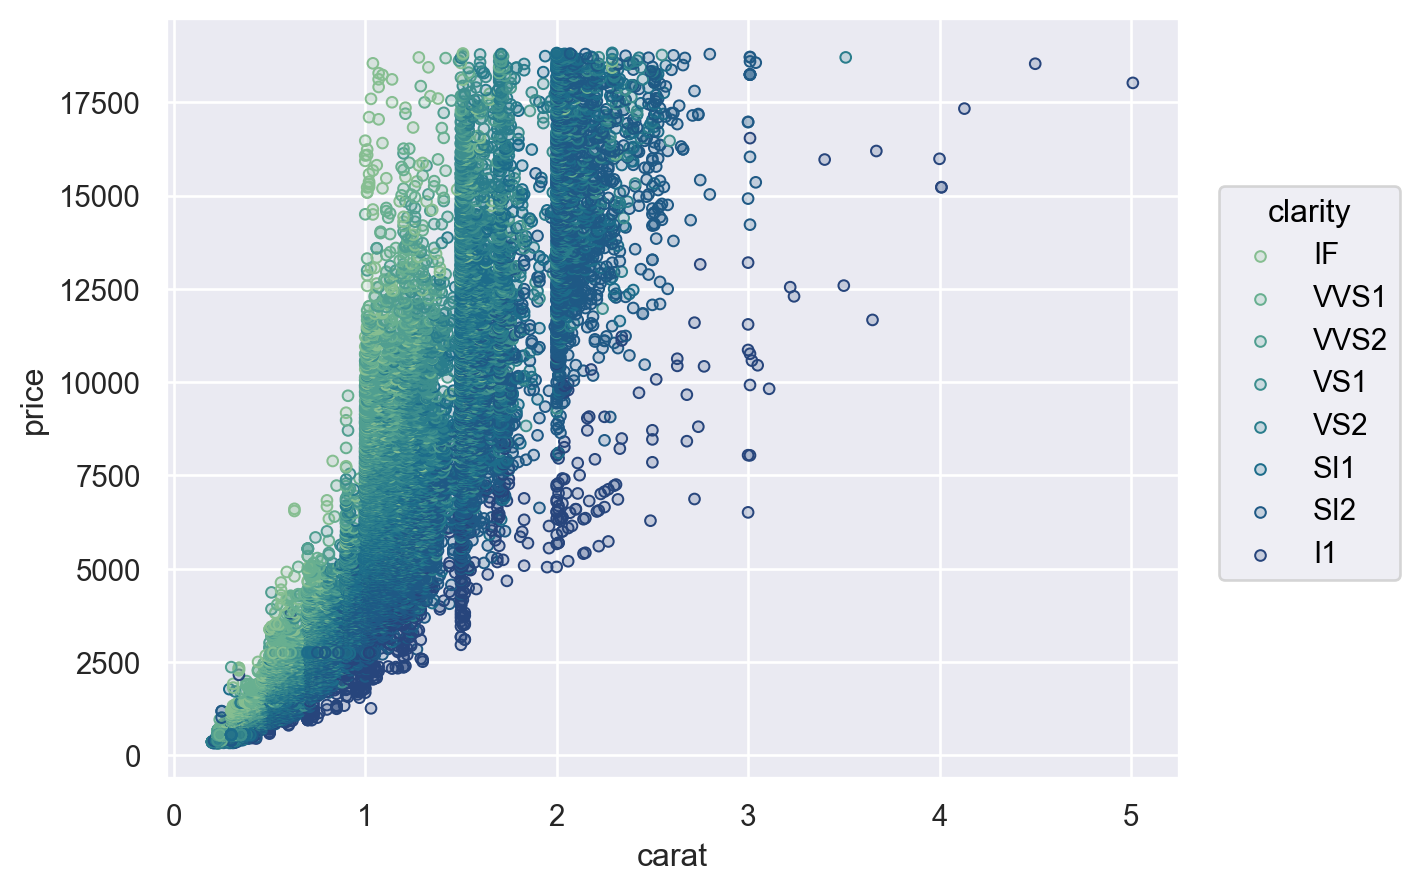

In [6]:
# String arguments can also specify the name of a palette, that defines the output values of the scale
p1.add(so.Dots(), color= 'clarity').scale(color= 'crest')

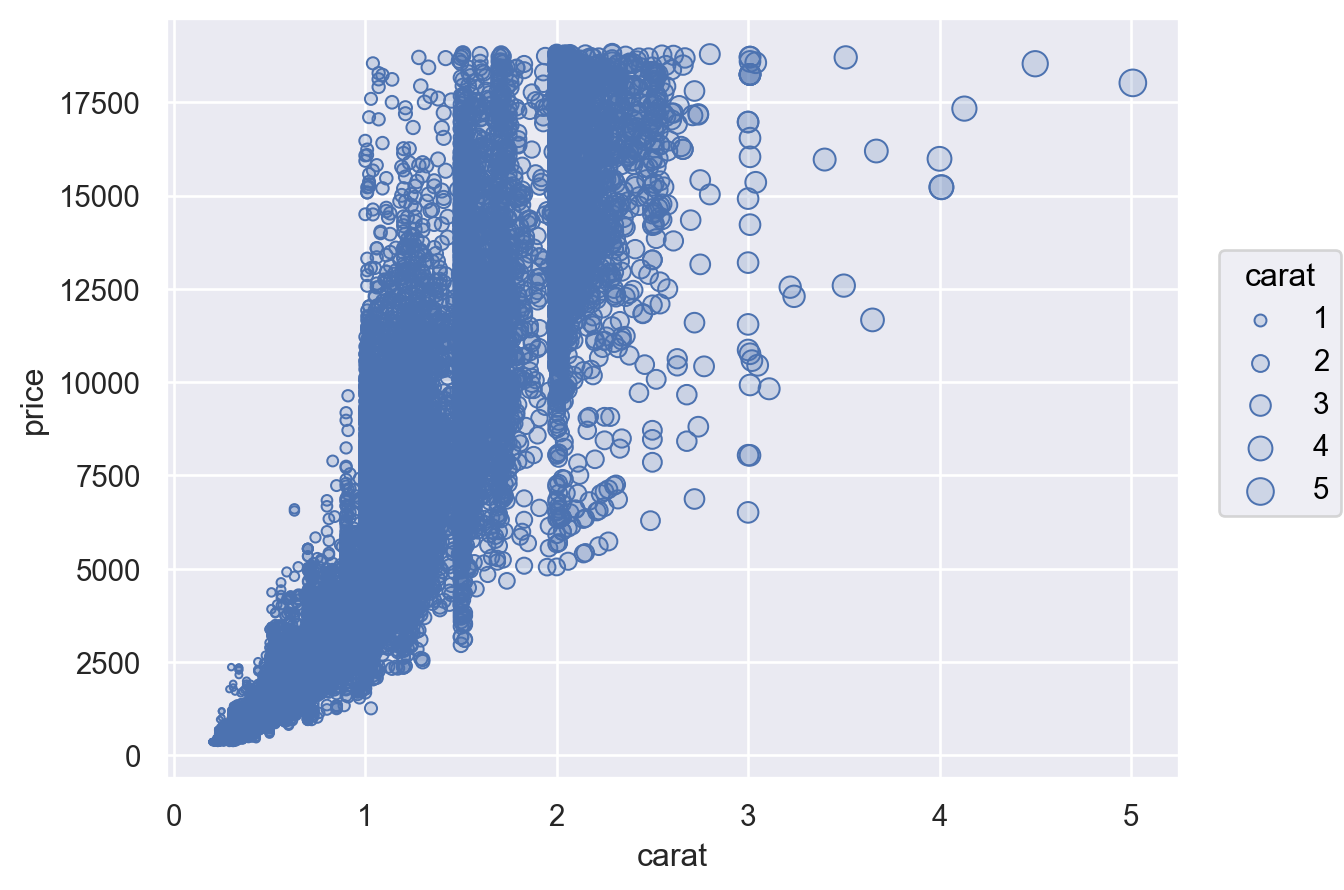

In [20]:
p1.add(so.Dots(), pointsize= 'carat').scale(pointsize= (2, 10))

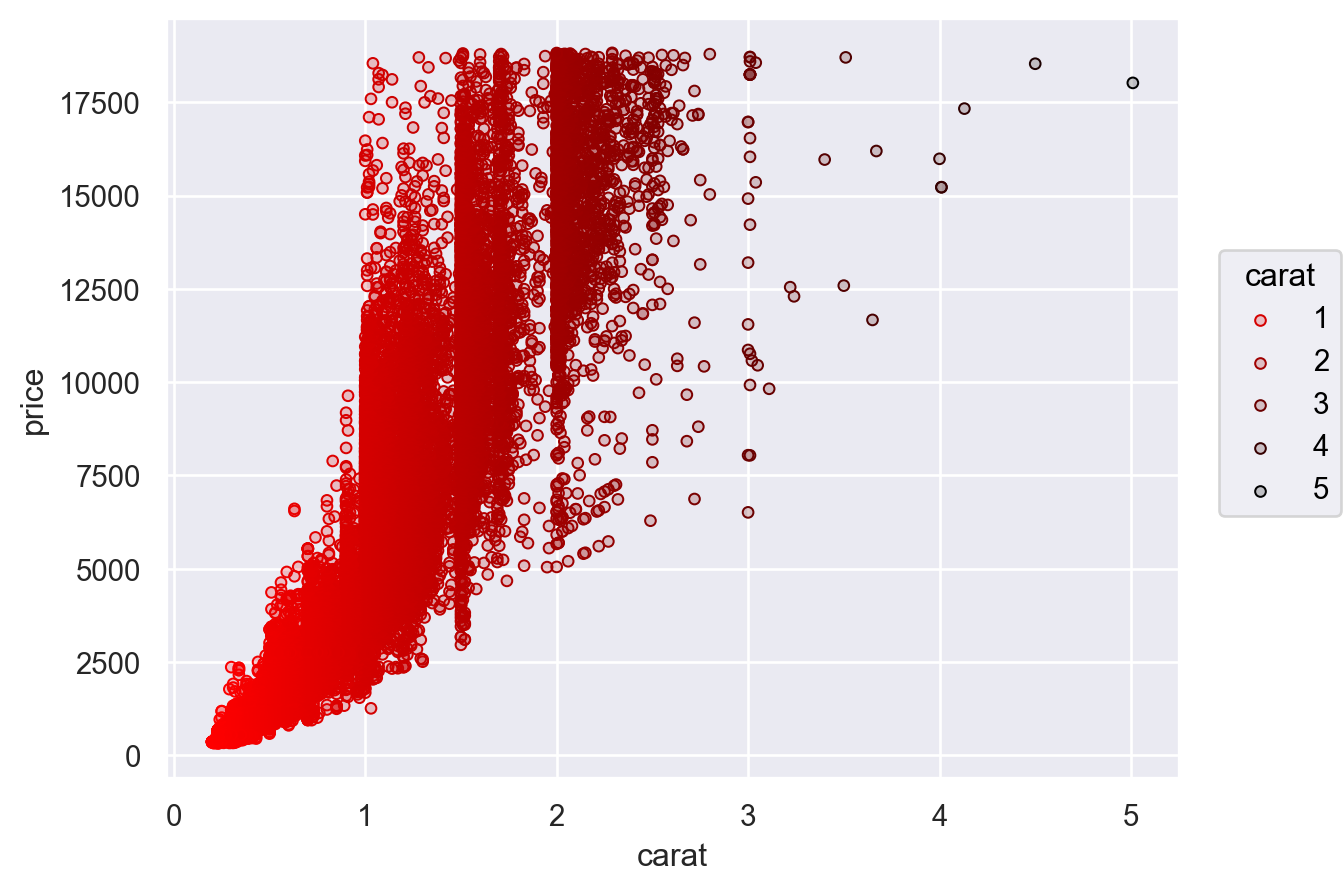

In [27]:
#The tuple format can also be used for a color scale using 
p1.add(so.Dots(), color= 'carat').scale(color= ('red', 'black'))

#### Continuous in Scale
For more control we can pass a scale object, such as **Continuous** which allows us to specify the input domin (norm), output range (values), and nonlinear transform (trans).

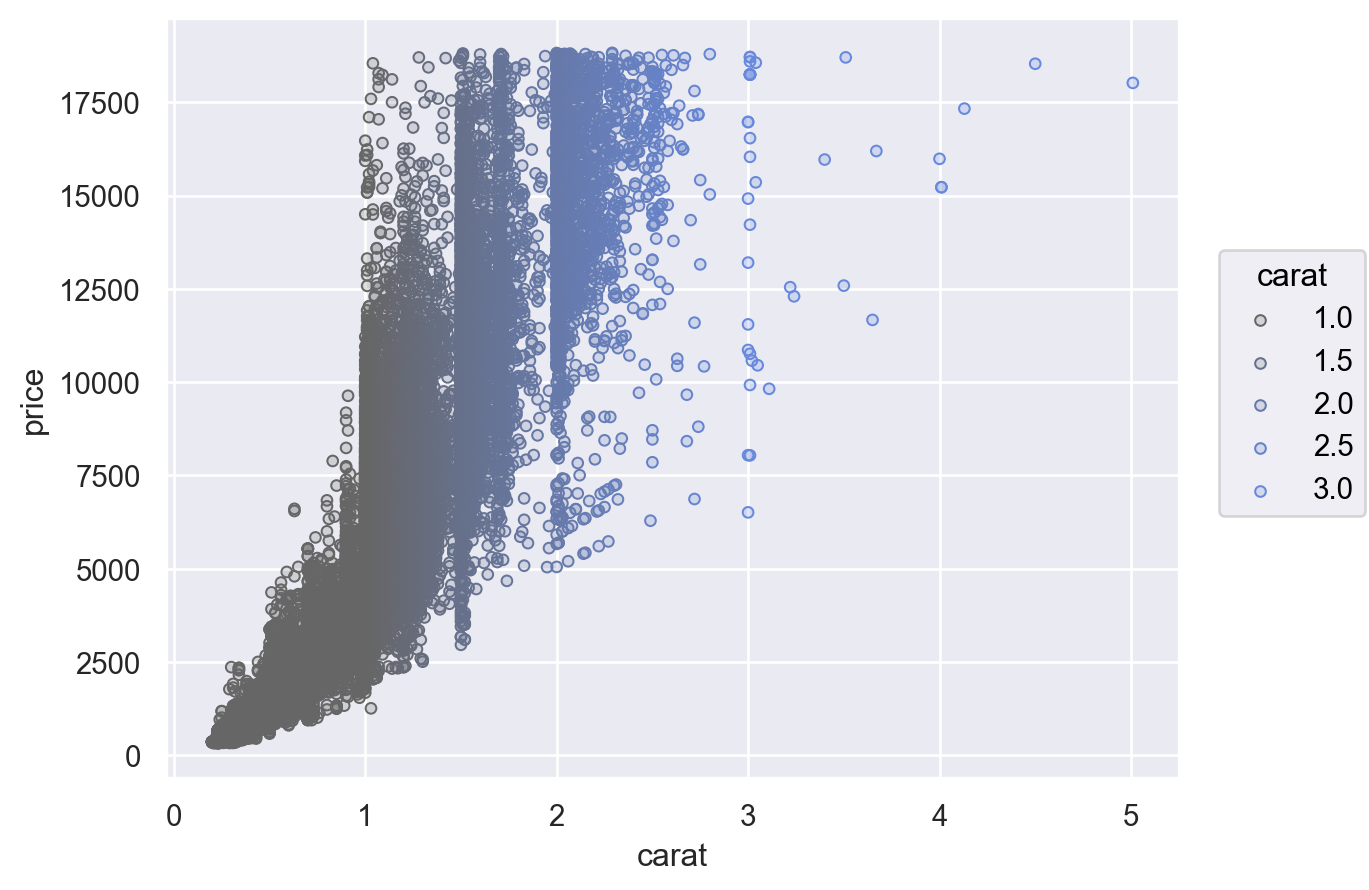

In [3]:
(
    p1.add(so.Dots(), color="carat")
    .scale(color=so.Continuous((".4", "#68d"), norm=(1, 3), trans="sqrt"))
)